In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings 
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('pima-indians-diabetes.csv')

In [23]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
data = pd.read_csv('pima-indians-diabetes.csv',header=None, names=col_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.shape

(768, 9)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
(data==0).sum(axis=0)

pregnant    111
glucose       5
bp           35
skin        227
insulin     374
bmi          11
pedigree      0
age           0
label       500
dtype: int64

There should be no 0 value for some of these parameters so we have to correct out using some techniques.

In [27]:
def replace_with_mean(df,feature):
    
    feature_mean = df[feature].mean()
    df[feature] = list(map(lambda x: feature_mean if x==0 else x, df[feature]))


replace_with_mean(data,"bp")
replace_with_mean(data,"bmi")
replace_with_mean(data,"glucose")

In [28]:
(data==0).sum(axis=0)

pregnant    111
glucose       0
bp            0
skin        227
insulin     374
bmi           0
pedigree      0
age           0
label       500
dtype: int64

In [29]:
data = data[(data["insulin"]!=0) & (data["skin"]!=0)]
(modified==0).sum(axis=0)

pregnant     57
glucose       0
bp            0
skin          0
insulin       0
bmi           0
pedigree      0
age           0
label       264
dtype: int64

In [30]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
6,3,78.0,50.0,32,88,31.0,0.248,26,1
8,2,197.0,70.0,45,543,30.5,0.158,53,1
13,1,189.0,60.0,23,846,30.1,0.398,59,1


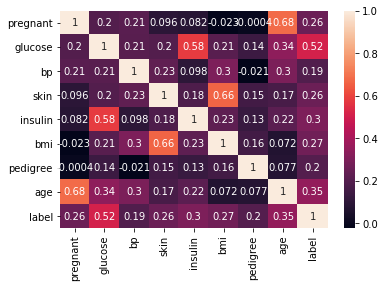

In [31]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix,annot=True)

 High correlation between skin thickness and BMI, and between insulin and glucose.

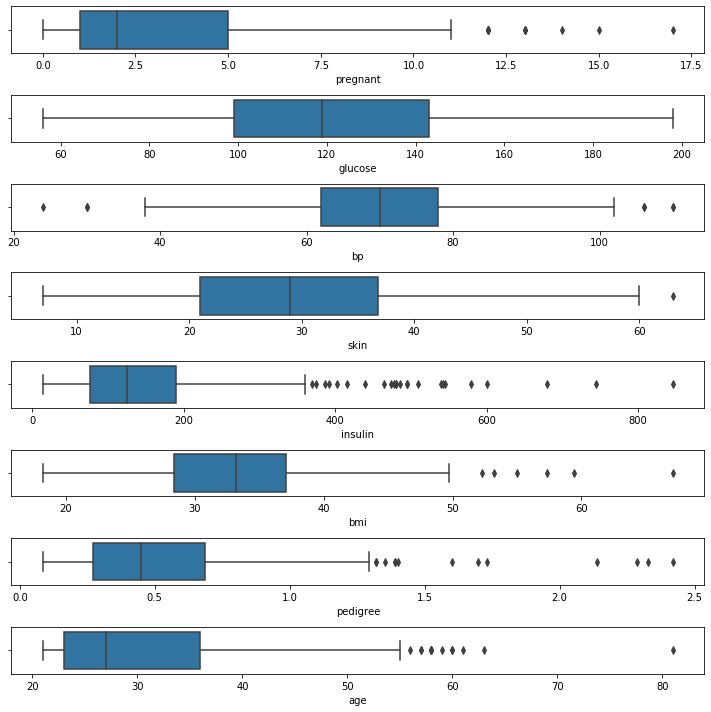

In [32]:
fig, axs = plt.subplots(8, figsize = (10,10))
plt1 = sns.boxplot(data['pregnant'], ax = axs[0])
plt2 = sns.boxplot(data['glucose'], ax = axs[1])
plt3 = sns.boxplot(data['bp'], ax = axs[2])
plt4 = sns.boxplot(data['skin'], ax = axs[3])
plt5 = sns.boxplot(data['insulin'], ax = axs[4])
plt6 = sns.boxplot(data['bmi'], ax = axs[5])
plt7 = sns.boxplot(data['pedigree'], ax = axs[6])
plt8 = sns.boxplot(data['age'], ax = axs[7])
plt.tight_layout()

In [36]:
X = data.drop(['label'], axis = 1)
y = data.label

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [38]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression()
    ]


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
print("="*30)

SVC
****Results****
Accuracy: 75.9494%
DecisionTreeClassifier
****Results****
Accuracy: 75.9494%
RandomForestClassifier
****Results****
Accuracy: 77.2152%
GradientBoostingClassifier
****Results****
Accuracy: 72.1519%
KNeighborsClassifier
****Results****
Accuracy: 72.1519%
LogisticRegression
****Results****
Accuracy: 79.7468%


In [39]:
df=pd.DataFrame(train_predictions)
df.to_csv('Pima indian diabetes model.csv')